<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module3/DataAnalysisWithPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Data Analysis with IMDB Movie data

In [3]:
dataset_path = 'IMDB-Movie-Data.csv'

data = pd.read_csv(dataset_path)

data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


##View some basic information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


From the above description, we can get some information such as:

*   The movies are in the year between 2006 and 2016
*   The average rating of movies is 6.72. The minimum is 1.90 and the maximum is 9.00
*   The average revenue (in millions) is 82.96,...



##Operations with pandas

Extract the genre column as series

In [7]:
genre_series = data['Genre']

genre_series

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


Get the genre column as data frame

In [8]:
genre_df = data[['Genre']]

genre_df

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


Make a customized data frame with selected columns

In [12]:
some_cols = data [['Title','Genre','Actors','Director','Rating']]

some_cols

,Title,Genre,Actors,Director,Rating
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi","Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",James Gunn,8.1
1,Prometheus,"Adventure,Mystery,Sci-Fi","Noomi Rapace, Logan Marshall-Green, Michael Fa...",Ridley Scott,7.0
2,Split,"Horror,Thriller","James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",M. Night Shyamalan,7.3
3,Sing,"Animation,Comedy,Family","Matthew McConaughey,Reese Witherspoon, Seth Ma...",Christophe Lourdelet,7.2
4,Suicide Squad,"Action,Adventure,Fantasy","Will Smith, Jared Leto, Margot Robbie, Viola D...",David Ayer,6.2
...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery","Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",Billy Ray,6.2
996,Hostel: Part II,Horror,"Lauren German, Heather Matarazzo, Bijou Philli...",Eli Roth,5.5
997,Step Up 2: The Streets,"Drama,Music,Romance","Robert Hoffman, Briana Evigan, Cassie Ventura,...",Jon M. Chu,6.2
998,Search Party,"Adventure,Comedy","Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",Scot Armstrong,5.6


Select some rows and columns

In [13]:
data.iloc[10:15][['Title', 'Rating', 'Revenue (Millions)']]

,Title,Rating,Revenue (Millions)
10,Fantastic Beasts and Where to Find Them,7.5,234.02
11,Hidden Figures,7.8,169.27
12,Rogue One,7.9,532.17
13,Moana,7.7,248.75
14,Colossal,6.4,2.87


Select data based on some conditions:

*   Movies from 2010 to 2015
*   Rating < 6.0
*   Revenue in top 5%



In [19]:
data[(data['Year'] >= 2010) & (data['Year'] <= 2015) &
     (data['Rating'] < 6.0) &
     (data['Revenue (Millions)'] > data['Revenue (Millions)'].quantile(0.95))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


Find the average ratings of every director

In [21]:
data.groupby('Director')[['Rating']].mean().sort_values('Rating', ascending=False).head()

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50


View missing values

In [24]:
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


Deal with missing values by deleting rows

In [ ]:
data.dropna() #Set inplace = true if we want to apply

Deal with missing values by filling

In [27]:
revenue_mean = data['Revenue (Millions)'].mean()

print ("The mean revenue is: ", revenue_mean )

df_new = data.fillna({'Revenue (Millions)': revenue_mean})

df_new.isnull().sum()

The mean revenue is:  82.95637614678898


,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


apply() functions:

In [28]:
def rating_group(rating):
  if rating >= 7.5:
    return 'Good'
  elif rating >= 6.0:
    return 'Average'
  else:
    return 'Bad'

data ['Rating_category'] = data ['Rating'].apply(rating_group)
data[['Title', 'Rating', 'Rating_category']].head()

,Title,Rating,Rating_category
0,Guardians of the Galaxy,8.1,Good
1,Prometheus,7.0,Average
2,Split,7.3,Average
3,Sing,7.2,Average
4,Suicide Squad,6.2,Average


#Data Analysis with Time Series data

In [33]:
dataset_path = 'opsd_germany_daily.csv'

opsd_daily = pd.read_csv(dataset_path)

opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


We can use the date as index since the elements are unique

In [34]:
opsd_daily = opsd_daily.set_index ('Date')

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Added more columns

In [36]:
opsd_daily = pd. read_csv('opsd_germany_daily.csv', index_col = 0, parse_dates = True )

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

opsd_daily.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


##Time-based indexing

Get information from 2014-01-20 to 2014-01-22:

In [40]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


Get information of 2014-02

In [39]:
opsd_daily.loc['2014-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-02-01,1391.430,282.132,41.298,323.430,2014,2,Saturday
2014-02-02,1265.416,107.799,33.744,141.543,2014,2,Sunday
2014-02-03,1598.551,108.910,35.126,144.036,2014,2,Monday
2014-02-04,1617.799,131.890,44.494,176.384,2014,2,Tuesday
2014-02-05,1623.241,217.711,49.166,266.877,2014,2,Wednesday
2014-02-06,1597.979,288.646,67.497,356.143,2014,2,Thursday
2014-02-07,1576.930,470.114,35.591,505.705,2014,2,Friday
2014-02-08,1365.813,361.931,45.606,407.537,2014,2,Saturday
2014-02-09,1252.107,423.278,44.165,467.443,2014,2,Sunday


##Visualizing time series data

<Axes: xlabel='Date'>

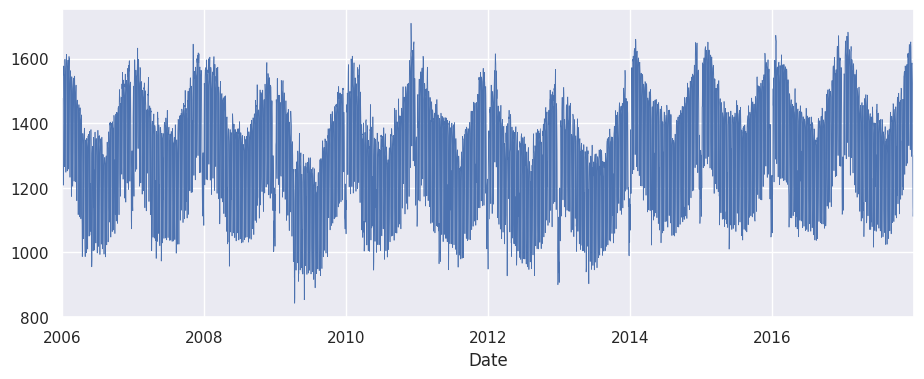

In [43]:
# Use seaborn style defaults and set the default figure size
sns . set(rc ={'figure.figsize':(11 , 4) })
opsd_daily['Consumption']. plot ( linewidth =0.5)

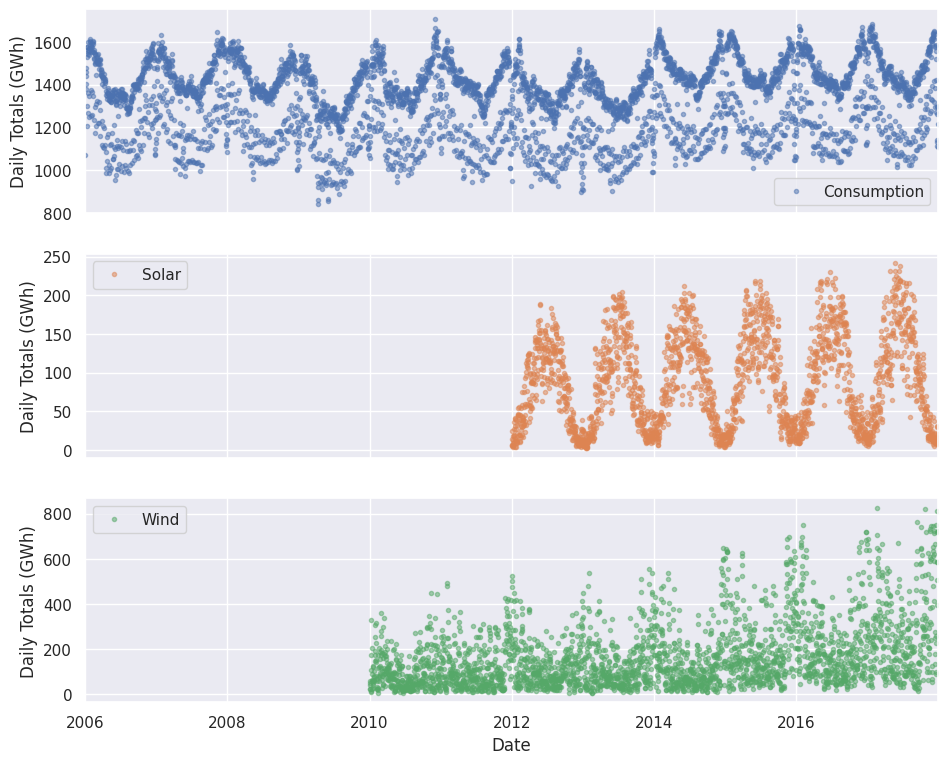

In [45]:
cols_plot = ['Consumption', 'Solar', 'Wind']
#marker = style of the dot, alpha = transparancy of the dot, linestyle = 'None' removes the line connecting the dot
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for ax in axes:
  ax.set_ylabel('Daily Totals (GWh)')
plt.show()

##Seasonality

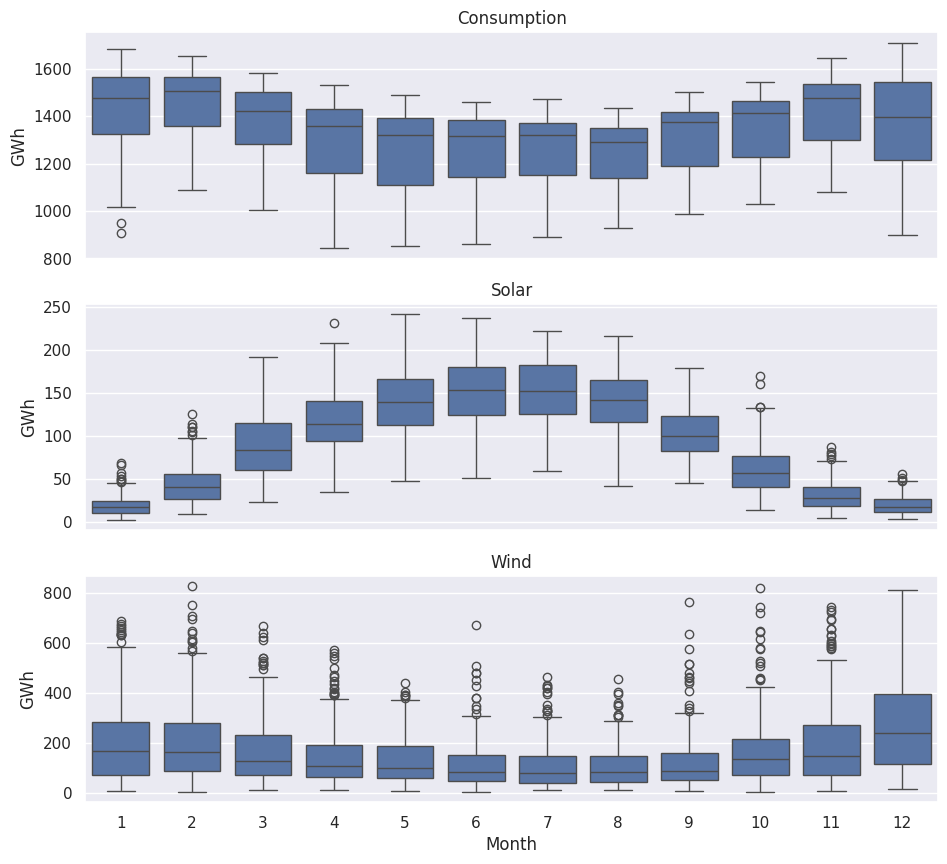

In [46]:
#(3,1): dimension
#sharex: Ensure all subplots share the same x-coordinate
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)


# Iterate over each energy source and create a boxplot
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')  # Set Y-axis label
    ax.set_title(name)  # Set title for each subplot

    # Remove x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

##Frequencies

In [47]:
pd. date_range ('1998-03-10', '1998-03-15', freq ='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [51]:
# Convert a list of specific dates into a Pandas DateTimeIndex
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select rows corresponding to the specified dates and only keep the 'Consumption' column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample


,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [52]:
consum_freq = consum_sample.asfreq('D')

# Create a column with missing values forward-filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')

consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


##Resampling

In [53]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [55]:
print(f'Original size: {opsd_daily.shape[0]}')
print(f'New size: {opsd_weekly_mean.shape[0]}')

Original size: 4383
New size: 627


Visulize daily and weekly time series of Solar

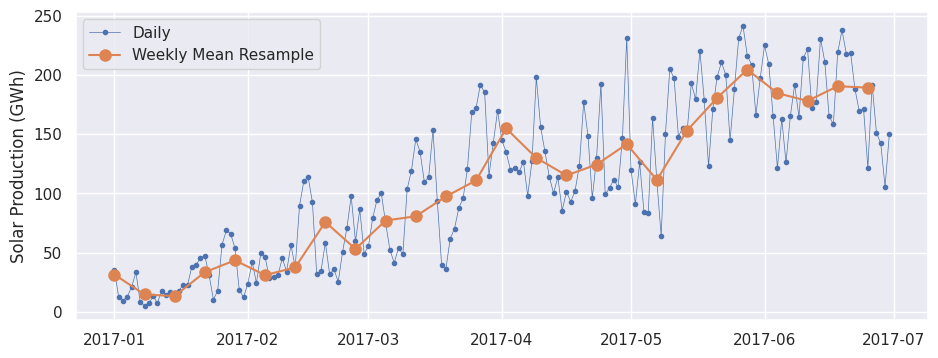

In [56]:
start , end = '2017-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

Handling null

In [58]:
# Resample the daily data to annual sums, setting NaN if a year has fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('YE').sum(min_count=360)

# Set the index to the year component for easier analysis
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']

# Display the last 3 rows
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


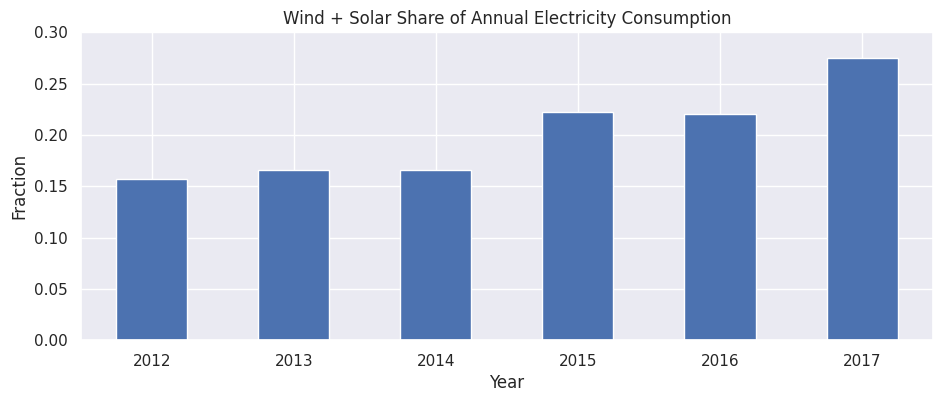

In [59]:
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')

# Label the y-axis
ax.set_ylabel('Fraction')

# Set the y-axis limits (0 to 0.3)
ax.set_ylim(0, 0.3)

# Set the plot title
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')

# Rotate x-axis labels (optional, 0 means no rotation)
plt.xticks(rotation=0)

# Show the plot
plt.show()

##Rolling windows

In [60]:
# Compute the centered 7- day rolling mean
opsd_7d = opsd_daily [ data_columns ]. rolling (7 , center = True ) . mean ()
opsd_7d . head (10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


##Trends

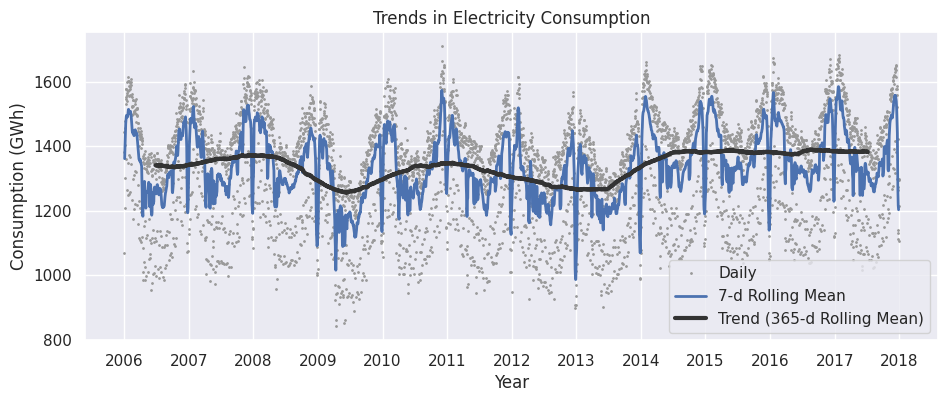

In [62]:
# Compute the 365-day rolling mean (handling missing values with min_periods=360)
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

# Create figure and axis
fig, ax = plt.subplots()

# Plot daily electricity consumption (raw data)
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')

# Plot 7-day rolling mean
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')

# Plot 365-day rolling mean (trend)
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

# Set x-axis to show yearly ticks
ax.xaxis.set_major_locator(mdates.YearLocator())

# Add legend, labels, and title
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

# Show the plot
plt.show()

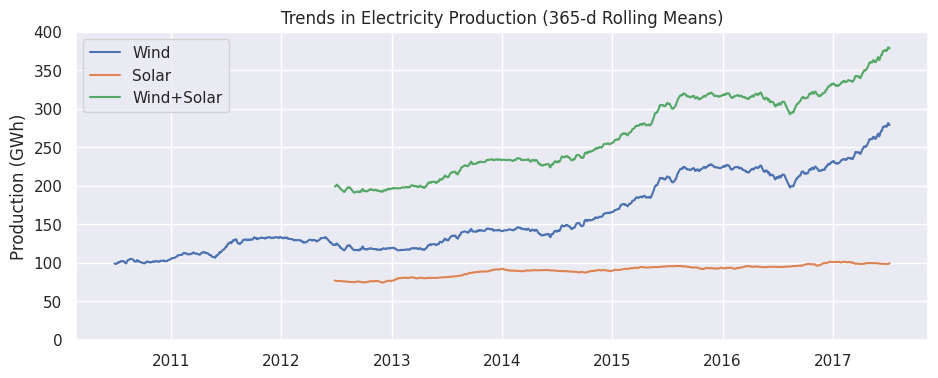

In [63]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot 365-day rolling mean for Wind, Solar, and Wind+Solar production
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)  # Plot each category

# Set x-axis to show yearly ticks
ax.xaxis.set_major_locator(mdates.YearLocator())

# Set y-axis limits
ax.set_ylim(0, 400)

# Add legend, labels, and title
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

# Show the plot
plt.show()